In [53]:
import pandas as pd
import pymc3 as pm
import altair as alt
import numpy as np

In [2]:
types = {'ID' : 'category', 'EINWOHNERKLASSE_WOHNORT' : 'category', 'KUNDENALTER' : int, 'ANZ_CS_KONTAKTE' : int,
       'ANZ_KINDER' : int, 'KINDER_GEB_SAISON' : 'category', 'ANZ_AUFTRAEGE' : int,
       'ANZ_AUFTRAEGE_0_TO_30' : int, 'ANZ_AUFTRAEGE_30_TO_90' : int,
       'ANZ_AUFTRAEGE_90_TO_180' : int, 'ANZ_AUFTRAEGE_180_TO_360' : int,
       'ANZ_AUFTRAEGE_360_TO_720' : int, 'ANZ_RETOUREN' : int, 'ANZ_RETOUREN_0_TO_30' : int,
       'ANZ_RETOUREN_30_TO_90' : int, 'ANZ_RETOUREN_90_TO_180' : int,
       'ANZ_RETOUREN_180_TO_360' : int, 'ANZ_RETOUREN_360_TO_720' : int,
       'SUM_LIEFERMENGE_AUFTRAEGE' : float, 'SUM_LIEFERMENGE_RETOUREN' : float,
       'ANZ_POSITIONEN_AUFTRAG' : int, 'ANZ_POSITIONEN_RETOUREN' : int,
       'ANZ_AUFTRAEGE_GSCHEIN' : int, 'SUM_RABATT_GSCHEIN'  : float, 'ANZ_AUFTRAEGE_NL' : int,
       'ANZ_NL_ERHALTEN_0_TO_30' : int, 'ANZ_NL_GEOEFFNET_0_TO_30' : int,
       'ANZ_AUFTRAEGE_NL_0_TO_30' : int, 'TAGE_ERSTKAUF' : int, 'TAGE_LETZTKAUF' : int,
       'TAGE_ERST_ZWEIT_KAUF' : int, 'TAGE_LETZT_VORLETZT_KAUF' : int, 'KAUF_NACH_FLYER' : 'category'}

data = pd.read_csv('20140415_Scoring_Modell_daten.csv', sep = ';', dtype = types, decimal = ',')

In [26]:
data.head()

,ID,EINWOHNERKLASSE_WOHNORT,KUNDENALTER,ANZ_CS_KONTAKTE,ANZ_KINDER,KINDER_GEB_SAISON,ANZ_AUFTRAEGE,ANZ_AUFTRAEGE_0_TO_30,ANZ_AUFTRAEGE_30_TO_90,ANZ_AUFTRAEGE_90_TO_180,...,SUM_RABATT_GSCHEIN,ANZ_AUFTRAEGE_NL,ANZ_NL_ERHALTEN_0_TO_30,ANZ_NL_GEOEFFNET_0_TO_30,ANZ_AUFTRAEGE_NL_0_TO_30,TAGE_ERSTKAUF,TAGE_LETZTKAUF,TAGE_ERST_ZWEIT_KAUF,TAGE_LETZT_VORLETZT_KAUF,KAUF_NACH_FLYER
0,1,100,37,3,0,0,15,0,0,1,...,58.85,1,10,0,0,4734,135,747,149,0
1,2,100,37,1,3,1,32,2,0,0,...,25.00,0,2,0,0,4660,17,4,6,0
2,3,100,37,0,3,1,36,0,0,0,...,43.57,2,10,0,0,4896,288,165,126,0
3,4,100,41,0,2,0,50,0,0,0,...,22.95,0,11,0,0,4580,209,413,136,0
4,5,100,51,6,2,0,8,1,1,1,...,5.00,0,3,0,0,4557,18,4287,21,0


In [90]:
data.describe()

,KUNDENALTER,ANZ_CS_KONTAKTE,ANZ_KINDER,ANZ_AUFTRAEGE,ANZ_AUFTRAEGE_0_TO_30,ANZ_AUFTRAEGE_30_TO_90,ANZ_AUFTRAEGE_90_TO_180,ANZ_AUFTRAEGE_180_TO_360,ANZ_AUFTRAEGE_360_TO_720,ANZ_RETOUREN,...,ANZ_AUFTRAEGE_GSCHEIN,SUM_RABATT_GSCHEIN,ANZ_AUFTRAEGE_NL,ANZ_NL_ERHALTEN_0_TO_30,ANZ_NL_GEOEFFNET_0_TO_30,ANZ_AUFTRAEGE_NL_0_TO_30,TAGE_ERSTKAUF,TAGE_LETZTKAUF,TAGE_ERST_ZWEIT_KAUF,TAGE_LETZT_VORLETZT_KAUF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,37.607900,0.620400,0.477800,14.750100,0.600000,0.739300,0.916900,2.332400,3.393400,5.313100,...,1.614100,12.248203,1.615300,6.190500,1.244800,0.058200,1264.728200,87.235600,225.914300,93.067800
std,7.824186,1.471775,0.912354,18.207718,0.862366,1.088877,1.437637,2.588393,4.690931,11.543214,...,2.286767,19.385119,3.955562,5.182441,2.165212,0.274628,1003.886037,107.863801,402.576152,152.268505
min,16.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,363.000000,13.000000,17.000000,11.000000
50%,37.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,...,1.000000,10.000000,0.000000,8.000000,0.000000,0.000000,1090.000000,41.000000,81.000000,46.000000
75%,42.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,3.000000,5.000000,5.000000,...,2.000000,15.000000,2.000000,10.000000,2.000000,0.000000,1891.000000,118.000000,269.000000,118.000000
max,60.000000,29.000000,9.000000,459.000000,13.000000,23.000000,48.000000,55.000000,134.000000,321.000000,...,45.000000,464.560000,104.000000,125.000000,20.000000,10.000000,5109.000000,683.000000,4696.000000,3079.000000


In [3]:
pd.isnull(data).any()

ID                           False
EINWOHNERKLASSE_WOHNORT      False
KUNDENALTER                  False
ANZ_CS_KONTAKTE              False
ANZ_KINDER                   False
KINDER_GEB_SAISON            False
ANZ_AUFTRAEGE                False
ANZ_AUFTRAEGE_0_TO_30        False
ANZ_AUFTRAEGE_30_TO_90       False
ANZ_AUFTRAEGE_90_TO_180      False
ANZ_AUFTRAEGE_180_TO_360     False
ANZ_AUFTRAEGE_360_TO_720     False
ANZ_RETOUREN                 False
ANZ_RETOUREN_0_TO_30         False
ANZ_RETOUREN_30_TO_90        False
ANZ_RETOUREN_90_TO_180       False
ANZ_RETOUREN_180_TO_360      False
ANZ_RETOUREN_360_TO_720      False
SUM_LIEFERMENGE_AUFTRAEGE    False
SUM_LIEFERMENGE_RETOUREN     False
ANZ_POSITIONEN_AUFTRAG       False
ANZ_POSITIONEN_RETOUREN      False
ANZ_AUFTRAEGE_GSCHEIN        False
SUM_RABATT_GSCHEIN           False
ANZ_AUFTRAEGE_NL             False
ANZ_NL_ERHALTEN_0_TO_30      False
ANZ_NL_GEOEFFNET_0_TO_30     False
ANZ_AUFTRAEGE_NL_0_TO_30     False
TAGE_ERSTKAUF       

In [3]:
dt = data.select_dtypes(include=['int', 'float'])
dt['ID'] = data['ID']
dt.head()

/home/vinzent/miniconda3/envs/dataenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,KUNDENALTER,ANZ_CS_KONTAKTE,ANZ_KINDER,ANZ_AUFTRAEGE,ANZ_AUFTRAEGE_0_TO_30,ANZ_AUFTRAEGE_30_TO_90,ANZ_AUFTRAEGE_90_TO_180,ANZ_AUFTRAEGE_180_TO_360,ANZ_AUFTRAEGE_360_TO_720,ANZ_RETOUREN,...,SUM_RABATT_GSCHEIN,ANZ_AUFTRAEGE_NL,ANZ_NL_ERHALTEN_0_TO_30,ANZ_NL_GEOEFFNET_0_TO_30,ANZ_AUFTRAEGE_NL_0_TO_30,TAGE_ERSTKAUF,TAGE_LETZTKAUF,TAGE_ERST_ZWEIT_KAUF,TAGE_LETZT_VORLETZT_KAUF,ID
0,37,3,0,15,0,0,1,1,1,3,...,58.85,1,10,0,0,4734,135,747,149,1
1,37,1,3,32,2,0,0,2,3,6,...,25.00,0,2,0,0,4660,17,4,6,2
2,37,0,3,36,0,0,0,1,2,5,...,43.57,2,10,0,0,4896,288,165,126,3
3,41,0,2,50,0,0,0,2,4,10,...,22.95,0,11,0,0,4580,209,413,136,4
4,51,6,2,8,1,1,1,4,0,0,...,5.00,0,3,0,0,4557,18,4287,21,5


In [4]:
plot_data = pd.melt(dt, id_vars = 'ID', value_vars = dt.columns[:28])
plot_data.head()

,ID,variable,value
0,1,KUNDENALTER,37.0
1,2,KUNDENALTER,37.0
2,3,KUNDENALTER,37.0
3,4,KUNDENALTER,41.0
4,5,KUNDENALTER,51.0


binning isn't perfect, but shows some skewed variables

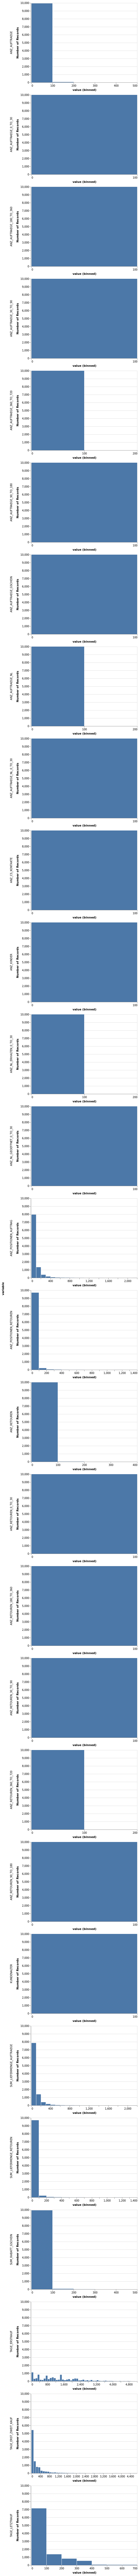

In [5]:
alt.data_transformers.enable('json')
alt.Chart(plot_data).mark_bar().encode(alt.X('value:Q', bin = alt.Bin(maxbins=100)), y = 'count()').facet(row = 'variable').resolve_scale(x = 'independent')

scatterplot matrix of some variables:
many correlalested variab

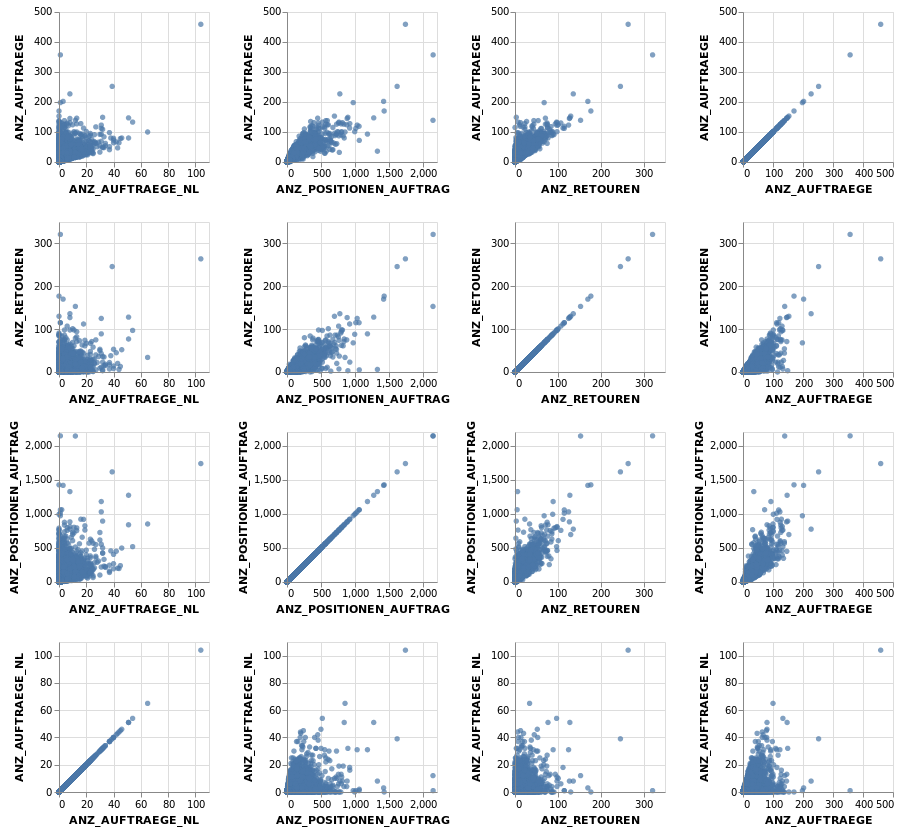

In [10]:
alt.Chart(dt).mark_circle().encode( alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')).properties(width=150, height=150).repeat(
    row = ['ANZ_AUFTRAEGE', 'ANZ_RETOUREN', 'ANZ_POSITIONEN_AUFTRAG', 'ANZ_AUFTRAEGE_NL'], column = ['ANZ_AUFTRAEGE_NL', 'ANZ_POSITIONEN_AUFTRAG', 'ANZ_RETOUREN', 'ANZ_AUFTRAEGE'])

train / test split

In [14]:
test = data.sample(frac = 2/3, random_state = 123)
train = data.drop(test.index)

OLS

In [65]:
with pm.Model() as model_1:
    # default priors: normally distributed, mimics ridge regression
    pm.glm.GLM.from_formula('KAUF_NACH_FLYER ~ EINWOHNERKLASSE_WOHNORT + KUNDENALTER + ANZ_CS_KONTAKTE + ANZ_KINDER + ANZ_AUFTRAEGE + ANZ_AUFTRAEGE_0_TO_30 + ANZ_AUFTRAEGE_30_TO_90 + \
                            ANZ_AUFTRAEGE_90_TO_180 + ANZ_AUFTRAEGE_180_TO_360 + ANZ_AUFTRAEGE_360_TO_720 + ANZ_RETOUREN', train, family=pm.glm.families.Binomial())
    
    #start_MAP = pm.find_MAP(fmin=optimize.fmin_powell)
    
    ## Sample using NUTS
    trace_1 = pm.sample(6000, step=pm.NUTS())

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ANZ_RETOUREN, ANZ_AUFTRAEGE_360_TO_720, ANZ_AUFTRAEGE_180_TO_360, ANZ_AUFTRAEGE_90_TO_180, ANZ_AUFTRAEGE_30_TO_90, ANZ_AUFTRAEGE_0_TO_30, ANZ_AUFTRAEGE, ANZ_KINDER, ANZ_CS_KONTAKTE, KUNDENALTER, EINWOHNERKLASSE_WOHNORT[T.500], EINWOHNERKLASSE_WOHNORT[T.250], EINWOHNERKLASSE_WOHNORT[T.2000], EINWOHNERKLASSE_WOHNORT[T.1000], Intercept]
Sampling 2 chains: 100%|██████████| 13000/13000 [04:30<00:00, 48.05draws/s]


In [66]:
pm.summary(trace_1[2000: ])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,-2.587310,0.326081,0.003382,-3.214319,-1.941607,9125.203558,0.999914
EINWOHNERKLASSE_WOHNORT[T.1000],-0.051384,0.351880,0.003399,-0.771101,0.593372,10122.797956,0.999890
EINWOHNERKLASSE_WOHNORT[T.2000],-0.011461,0.259662,0.001979,-0.548501,0.475928,14528.568303,0.999881
EINWOHNERKLASSE_WOHNORT[T.250],-0.543112,0.386269,0.003174,-1.313618,0.170934,13747.528736,0.999878
EINWOHNERKLASSE_WOHNORT[T.500],0.206100,0.210887,0.001630,-0.198694,0.634843,14770.547655,0.999892
KUNDENALTER,-0.012698,0.008300,0.000085,-0.029133,0.003349,9518.463572,0.999876
ANZ_CS_KONTAKTE,0.009369,0.038928,0.000388,-0.066644,0.085599,11993.037318,0.999882
ANZ_KINDER,-0.074005,0.068697,0.000608,-0.202556,0.067561,13119.451924,0.999950
ANZ_AUFTRAEGE,0.004236,0.007072,0.000083,-0.009648,0.017599,8063.245444,0.999986
ANZ_AUFTRAEGE_0_TO_30,0.206374,0.066757,0.000631,0.073486,0.333975,11954.810196,0.999877


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe81be12e8>,
      dtype=object)

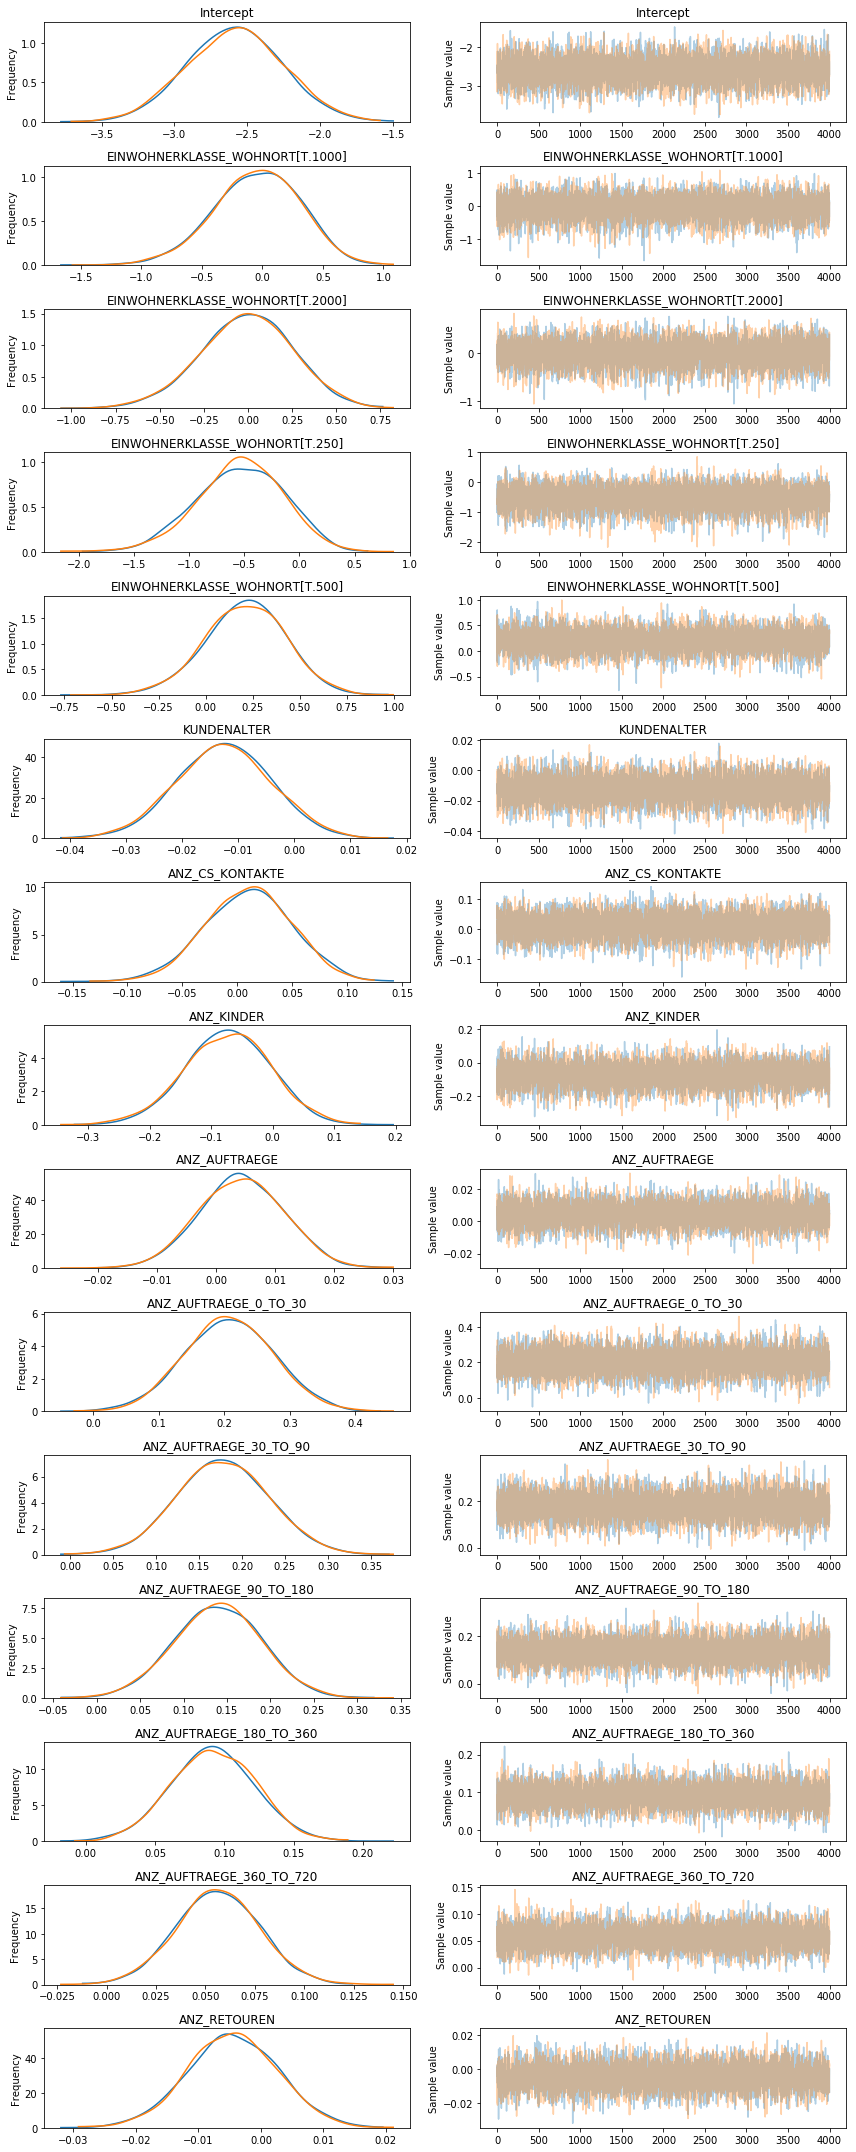

In [67]:
pm.traceplot(trace_1[2000: ])

posterior predictive check:

In [68]:
ppc_1 = pm.sample_posterior_predictive(trace_1[2000: ], samples=500, model = model_1)

100%|██████████| 500/500 [00:01<00:00, 293.64it/s]


In [70]:
ppc_1

{'y': array([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])}